In [5]:
import os
import socket
import subprocess
import pandas as pd
import io
from contextlib import redirect_stdout
import itertools
import warnings
from datetime import datetime
import time
import timeout_decorator
import numpy as np
import matplotlib.pyplot as plt
import math
import sys


In [6]:
def islocal(): return socket.gethostname()=="rc-idsia-macBook.local"
def isserver(): return socket.gethostname()=="ec6120930b2d"
def strdate(): return datetime.today().strftime('%Y-%m-%d-%H-%M-%S')


if islocal():
    prj_path = "/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema/CreMA"
elif isserver():
    prj_path="/home/rcabanas/work_java_crema/crema/CreMA"
else:
    warnings.warn("Unknown server, set prj_path variable manually.")
    prj_path= ""                      # put here the absolute path to the CreMA foder <<<<<<

In [7]:
os.chdir(prj_path)
!pwd

/home/rcabanas/work_java_crema/crema/CreMA


In [8]:
exp_folder = f"{prj_path}/papers/pgm20/experiments/"
log_folder = f"{exp_folder}/logs/"
res_folder = f"{exp_folder}/results/"

In [9]:
sys.path.append(exp_folder)
from utilplots import *

In [10]:
### Results with the chain where exogenous variables have 6 states
binResExo6 = {
    "markovian_ev" : f"{res_folder}/2020-05-10-18-28-51_chain_markovian_ev.csv",
    "nonmarkovian_ev": f"{res_folder}/2020-05-15-06-25-18_chain_nonmarkovian_ev.csv",
    "nonmarkovian_prec" : f"{res_folder}/2020-05-16-06-06-14_chain_nonmarkovian_prec.csv"
}

### Results with the HMM-like model
hmmRes = {
    "markovian_ev": f"{res_folder}/2020-05-13-04-01-42_hmm_markovian_ev.csv",
    "nonmarkovian_ev": f"{res_folder}/2020-05-13-22-47-34_hmm_nonmarkovian_ev.csv",
    "nonmarkovian_prec" : f"{res_folder}/2020-05-17-04-27-29_hmm_nonmarkovian_prec.csv"
}

## Dictionary with the models to show
res = {
    "Chain 2-6":binResExo6,
    "HMM 2-6":hmmRes
}


# Time results

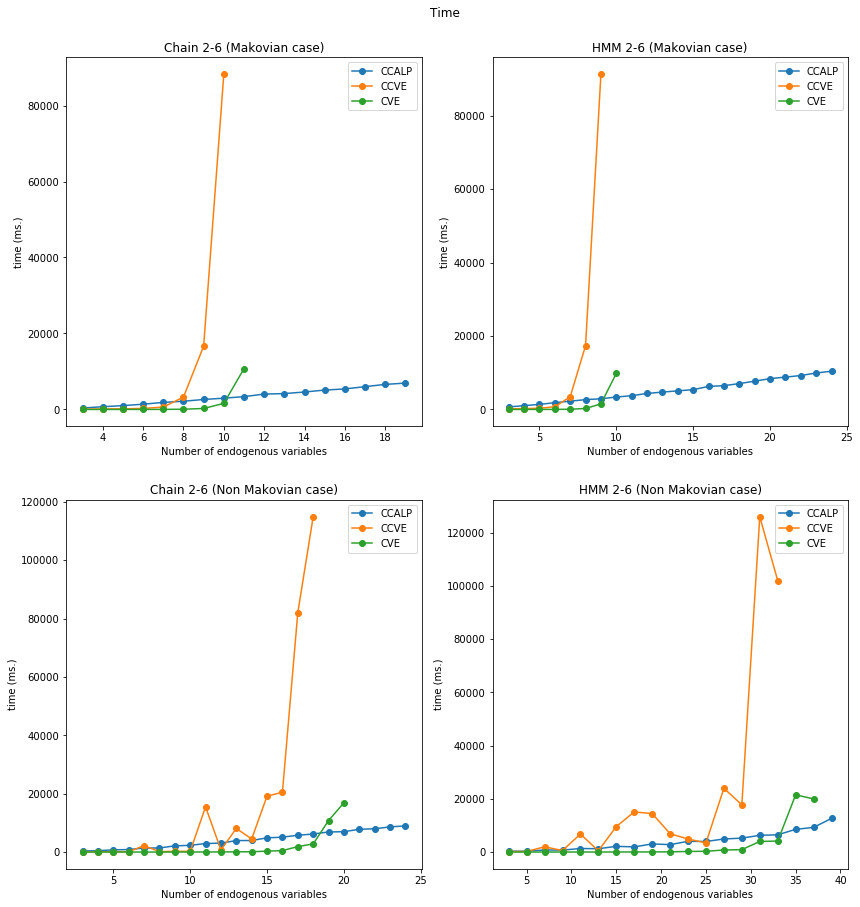

In [12]:
fig, axs = plt.subplots(2, len(list(res)), figsize=(14,14))

plot_func = plot_time
ylabel = "time (ms.)"
fig.suptitle("Time")
fig.subplots_adjust(top=0.93)
target = "target!=1"


for k,v in res.items():
    
    i = list(res).index(k)

    
    plot_func(pd.read_csv(v["markovian_ev"]), 
              ax=axs[0,i],
              title=f"{k} (Makovian case)",
              xlabel="Number of endogenous variables", ylabel=ylabel)
    
    
    data = pd.read_csv(v["nonmarkovian_ev"])
    
    plot_func(data, 
          ax=axs[1,i],
          title=f"{k} (Non Makovian case)",
          xlabel="Number of endogenous variables", ylabel=ylabel)

    

# Interval size results

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice


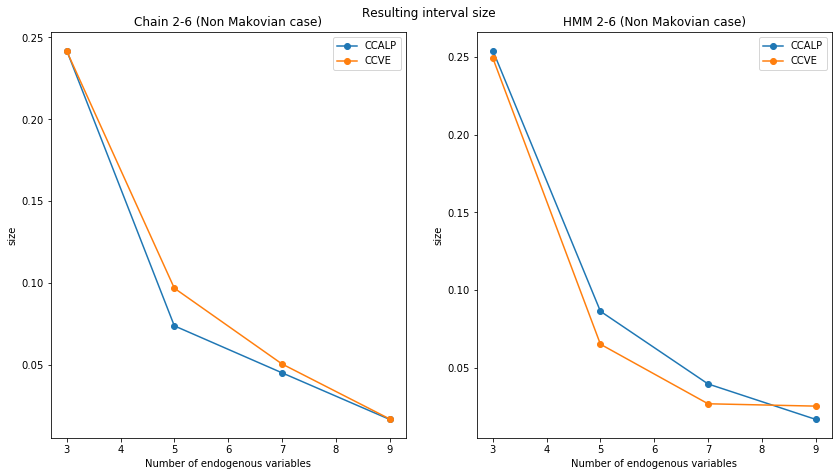

In [78]:
fig, axs = plt.subplots(1, len(list(res)), figsize=(14,7))

plot_func = plot_size
ylabel = "size"
fig.suptitle("Resulting interval size")
fig.subplots_adjust(top=0.93)
target = "target!=1"



for k,v in res.items():
    
    i = list(res).index(k)
    
    data = pd.read_csv(v["nonmarkovian_prec"])
    
    plot_func(data, 
          ax=axs[i],
          title=f"{k} (Non Makovian case)",
          xlabel="Number of endogenous variables", ylabel=ylabel)

# RMSE results

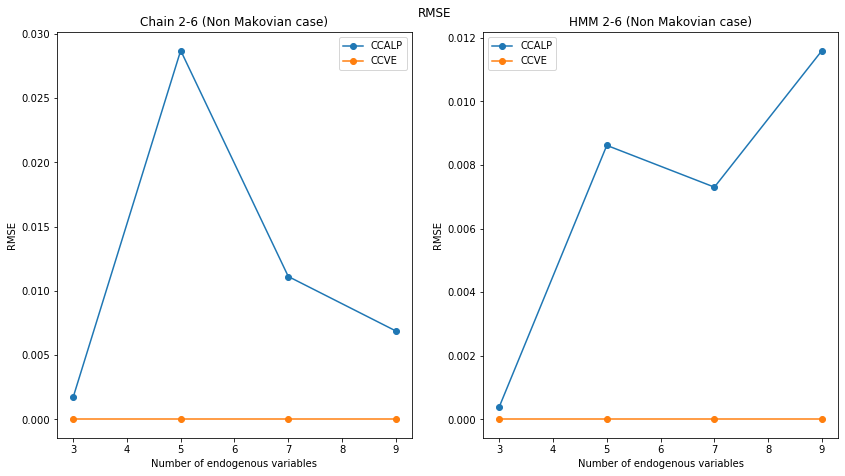

In [80]:
fig, axs = plt.subplots(1, len(list(res)), figsize=(14,7))

plot_func = plot_rmse
ylabel = "RMSE"
fig.suptitle("RMSE")
fig.subplots_adjust(top=0.93)

target = "target!=1"



for k,v in res.items():
    
    i = list(res).index(k)

    
    #data = pd.read_csv(v["markovian_ev"])

    #plot_func(pd.read_csv(v["markovian_ev"]), ax=axs[0,i], title=f"{k} (Makovian case)",xlabel="Number of endogenous variables", ylabel=ylabel)
    
    
    data = pd.read_csv(v["nonmarkovian_prec"])
    
    plot_func(data, 
          ax=axs[i], # [1,i]
          title=f"{k} (Non Makovian case)",
          xlabel="Number of endogenous variables", ylabel=ylabel)